## Exercises large classes (Week_03)

## 1. Working with strings

### a) Import car dataset

In [1]:
# Iport the necessary libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data 'cars_autoscout24.csv' into a DataFrame
df = pd.read_csv('cars_autoscout24.csv', sep=';')

# Change column names to lowercase
df.columns = df.columns.str.lower()

# Display the first 5 rows of the DataFrame
df.head()

,offer_id,type,price_raw,hp_raw,init_regist,mileage_raw,fuel_type,transmission,description
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,Hubraum: 2'967 cm3 Zylinder: 6 Anhängelast geb...
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,Hubraum: 1'796 cm3 Zylinder: 4 Letzte Prüfung:...
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,Hubraum: 3'498 cm3 Zylinder: 6 Anhängelast geb...
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,Hubraum: 1'991 cm3 Zylinder: 4 Letzte Prüfung:...
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,Hubraum: 1'984 cm3 Zylinder: 4 Letzte Prüfung:...


### b) Create a new variable 'str_len' containing the length of each string in the variable 'description'.

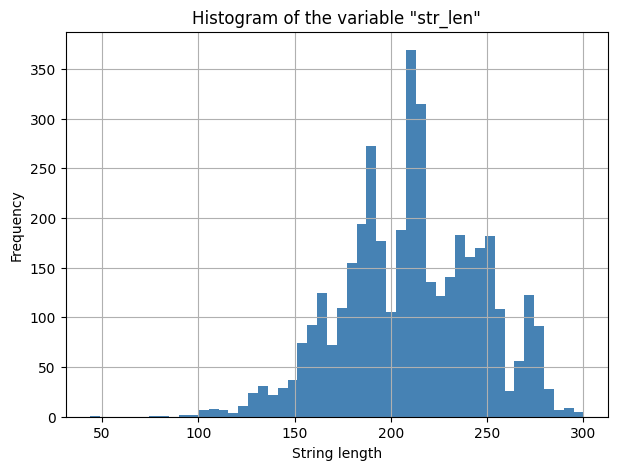

In [2]:
# Create a new variable 'str_len' containing the length of each string in the variable 'description'
df['str_len'] = df['description'].apply(len)

# Plot a histogram of the variable 'str_len'
plt.figure(figsize=(7, 5))
plt.hist(df['str_len'], bins=50, color='steelblue')
plt.title('Histogram of the variable "str_len"')
plt.xlabel('String length')
plt.ylabel('Frequency')
plt.grid()
plt.show()


### c) Create a new variable 'description_upper' from 'description' containing only uppercase letters

In [3]:
# Create a new variable 'description_upper' from 'description'
df['description_upper'] = df['description'].str.upper()

# Display the first 5 rows of the DataFrame
df[['description', 'description_upper']]

,description,description_upper
0,Hubraum: 2'967 cm3 Zylinder: 6 Anhängelast geb...,HUBRAUM: 2'967 CM3 ZYLINDER: 6 ANHÄNGELAST GEB...
1,Hubraum: 1'796 cm3 Zylinder: 4 Letzte Prüfung:...,HUBRAUM: 1'796 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...
2,Hubraum: 3'498 cm3 Zylinder: 6 Anhängelast geb...,HUBRAUM: 3'498 CM3 ZYLINDER: 6 ANHÄNGELAST GEB...
3,Hubraum: 1'991 cm3 Zylinder: 4 Letzte Prüfung:...,HUBRAUM: 1'991 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...
4,Hubraum: 1'984 cm3 Zylinder: 4 Letzte Prüfung:...,HUBRAUM: 1'984 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...
...,...,...
3975,Hubraum: 3'586 cm3 Zylinder: 8 Letzte Prüfung:...,HUBRAUM: 3'586 CM3 ZYLINDER: 8 LETZTE PRÜFUNG:...
3976,Hubraum: 5'491 cm3 Zylinder: 8 Letzte Prüfung:...,HUBRAUM: 5'491 CM3 ZYLINDER: 8 LETZTE PRÜFUNG:...
3977,Hubraum: 6'209 cm3 Zylinder: 8 Aussenfarbe: sc...,HUBRAUM: 6'209 CM3 ZYLINDER: 8 AUSSENFARBE: SC...
3978,Hubraum: 2'792 cm3 Zylinder: 6 Anhängelast geb...,HUBRAUM: 2'792 CM3 ZYLINDER: 6 ANHÄNGELAST GEB...


### d) Remove all leading and trailing empty spaces in 'description_upper'

In [4]:
# Remove all leading and trailing empty spaces in 'description_upper'
df['description_upper'] = df['description_upper'].str.strip()

# Display the first 5 rows of the DataFrame
df['description_upper'].head()

0    HUBRAUM: 2'967 CM3 ZYLINDER: 6 ANHÄNGELAST GEB...
1    HUBRAUM: 1'796 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...
2    HUBRAUM: 3'498 CM3 ZYLINDER: 6 ANHÄNGELAST GEB...
3    HUBRAUM: 1'991 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...
4    HUBRAUM: 1'984 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...
Name: description_upper, dtype: object

## 2.) Working with Regular expressions (regex)

### a) Extract the price as numerical value

In [5]:
# Function to extract numerical values from the price column
def extract_numerical_value(price):
    # Use regex to extract numerical values
    match = re.search(r"(\d+\'\d+)", price)
    if match:
        # Remove the thousands separator and convert to integer
        return float(match.group().replace("'", ''))
    else:
        return None

# Apply the function
df['price'] = df['price_raw'].apply(extract_numerical_value)

# Show pice_raw and price columns
df[['price_raw', 'price']].head()

,price_raw,price
0,CHF 22'500.–,22500.0
1,CHF 23'749.–,23749.0
2,CHF 18'500.–,18500.0
3,CHF 36'000.–,36000.0
4,CHF 48'500.–,48500.0


### b) Extract the original price (germ.: Neupreis) from 'description_upper'

In [6]:
# Function to extract the original price
def extract_original_price(description):
    # Use regex to extract numerical values
    # Extract the numeric value of Neupreis
    neupreis_pattern = r'NEUPREIS:\s*CHF\s*([\d\'.]+)'

    # Extract the numeric value of Neupreis
    match = re.search(neupreis_pattern, description)

    if match:
        # Remove thousands separator (')
        return float(match.group(1).replace("'", ""))
    else:
        None

# Apply the function
df['price_original'] = df['description_upper'].apply(extract_original_price)

# Show the price and original price
df[['price', 'price_original']]

,price,price_original
0,22500.0,72000.0
1,23749.0,NaN
2,18500.0,786770.0
3,36000.0,NaN
4,48500.0,89750.0
...,...,...
3975,58400.0,254000.0
3976,15900.0,NaN
3977,42000.0,NaN
3978,9980.0,NaN


### c) Create a new binary variable 'occassion' with a value of '1' if Fahrzeugart Occasion and a value of '0' otherwise

In [7]:
# Create a new column with the number of occassion cars
df['occassion'] = df['description_upper'].str.contains(pat = 'OCCASION').astype(int)

# Number of occasion cars
print(df['occassion'].sum())

# Show the data
df.head()

3901


,offer_id,type,price_raw,hp_raw,init_regist,mileage_raw,fuel_type,transmission,description,str_len,description_upper,price,price_original,occassion
0,7324420,AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...,CHF 22'500.–,245 PS,10.2014,75'000 km,Diesel,Automatisiertes Schaltgetriebe,Hubraum: 2'967 cm3 Zylinder: 6 Anhängelast geb...,252,HUBRAUM: 2'967 CM3 ZYLINDER: 6 ANHÄNGELAST GEB...,22500.0,72000.0,1
1,7512768,MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet),CHF 23'749.–,184 PS,6.2013,46'655 km,Benzin,Automat sequentiell,Hubraum: 1'796 cm3 Zylinder: 4 Letzte Prüfung:...,180,HUBRAUM: 1'796 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...,23749.0,NaN,1
2,7512034,MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...,CHF 18'500.–,306 PS,6.2011,138'955 km,Benzin,Automat sequentiell,Hubraum: 3'498 cm3 Zylinder: 6 Anhängelast geb...,213,HUBRAUM: 3'498 CM3 ZYLINDER: 6 ANHÄNGELAST GEB...,18500.0,786770.0,1
3,7512728,MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...,CHF 36'000.–,360 PS,8.2015,43'000 km,Benzin,Automatisiertes Schaltgetriebe,Hubraum: 1'991 cm3 Zylinder: 4 Letzte Prüfung:...,199,HUBRAUM: 1'991 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...,36000.0,NaN,1
4,7490242,AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...,CHF 48'500.–,252 PS,9.2018,43'300 km,Benzin,Automatisiertes Schaltgetriebe,Hubraum: 1'984 cm3 Zylinder: 4 Letzte Prüfung:...,205,HUBRAUM: 1'984 CM3 ZYLINDER: 4 LETZTE PRÜFUNG:...,48500.0,89750.0,1


## 3.) Working with pivot tables

### a) Create a subset of the data frame with all missing and duplicated values removed 

In [8]:
# Create a subset of the data without missing values and duplicates
df_sub = df.dropna().drop_duplicates()
df_sub.head()

# Check for missing values
print('Missing values per variable:')
print(df_sub.isna().sum())

# Check for duplicated values
print('\nDuplicated values:')
print(df_sub.duplicated().sum())

Missing values per variable:
offer_id             0
type                 0
price_raw            0
hp_raw               0
init_regist          0
mileage_raw          0
fuel_type            0
transmission         0
description          0
str_len              0
description_upper    0
price                0
price_original       0
occassion            0
dtype: int64

Duplicated values:
0


###  b) Create a pivot table

In [9]:
# Create a pivot table with:
# - 'Occassion' as index variable,
# - 'Price_numeric' and 'Price_orinigal' as values
# - np.mean (i.e. mean from the numpy library) as the aggregation function

# Create a pivot table
pivot_table = pd.pivot_table(
    df_sub[['price', 'price_original', 'occassion']],
    index='occassion',
    values=['price', 'price_original'],
    aggfunc='mean').round(1)

# Display the pivot table
pivot_table

,price,price_original
occassion,,
0,71746.1,91411.9
1,31964.0,83367.4
